<a href="https://colab.research.google.com/github/Harshkotkar/Deep-Learning/blob/main/cnn001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

2025-08-04 06:42:54.778027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754289775.150918      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754289775.251897      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train=x_train.reshape((-1,28,28,1)).astype("float32")/255
x_test=x_test.reshape((-1,28,28,1)).astype("float32")/255


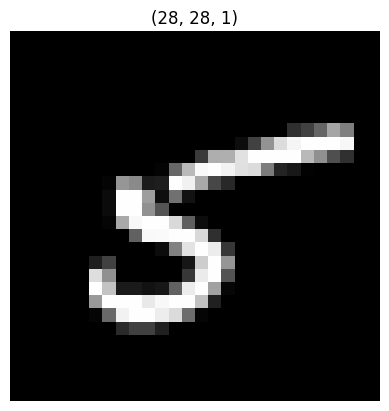

In [ ]:
img_scale=x_train[145]
plt.imshow(img_scale,cmap="gray")
plt.title(img_scale.shape)
plt.axis(False)
plt.show()


In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

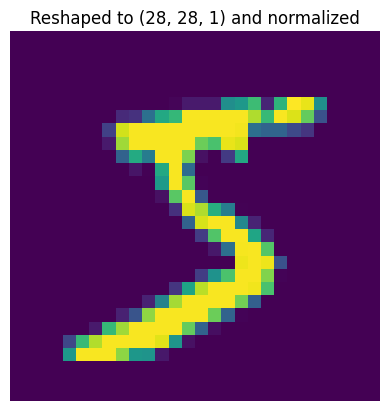

In [ ]:
# Reshape and normalize
reshaped_image = x_train[0].reshape(28, 28)

plt.imshow(reshaped_image)
plt.title("Reshaped to (28, 28, 1) and normalized")
plt.axis("off")
plt.show()


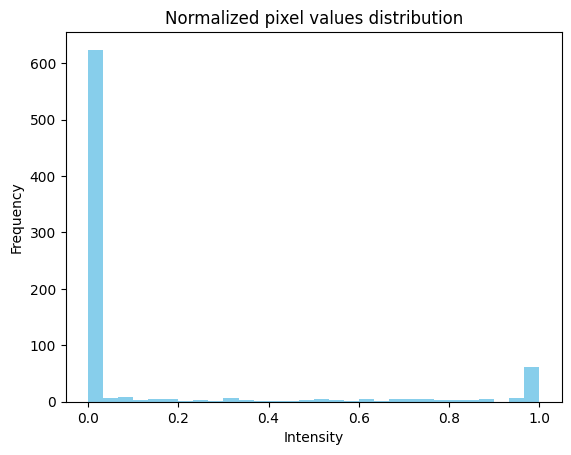

In [ ]:
import numpy as np

plt.hist(x_train[0].reshape(-1), bins=30, color='skyblue')
plt.title("Normalized pixel values distribution")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model=Sequential([
    Conv2D(filters=36,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(256,activation="relu"),
    Dense(10,activation="softmax")

])

I0000 00:00:1754289795.395619      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754289795.396402      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
early_stop=EarlyStopping(monitor='val_loss',
                        patience=10,
                        restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=64,callbacks=[early_stop],validation_split=0.1)

Epoch 1/100


I0000 00:00:1754289799.978309      96 service.cc:148] XLA service 0x7828e4003040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754289799.979801      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754289799.979818      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754289800.340537      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


 56/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4928 - loss: 1.5421

I0000 00:00:1754289803.642357      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8725 - loss: 0.4001 - val_accuracy: 0.9845 - val_loss: 0.0521
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9830 - loss: 0.0536 - val_accuracy: 0.9887 - val_loss: 0.0381
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9868 - val_loss: 0.0465
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9878 - val_loss: 0.0433
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9939 - loss: 0.0180 - val_accuracy: 0.9907 - val_loss: 0.0362
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9946 - loss: 0.0158 - val_accuracy: 0.9895 - val_loss: 0.0425
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9920 - val_loss: 0.0346
Epoch 8/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9967 - loss: 0.0092 - val_accuracy: 0.991

In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f"test loss{test_loss}")
print(f"test accuracy{test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0425
test loss0.03463955596089363
test accuracy0.9900


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


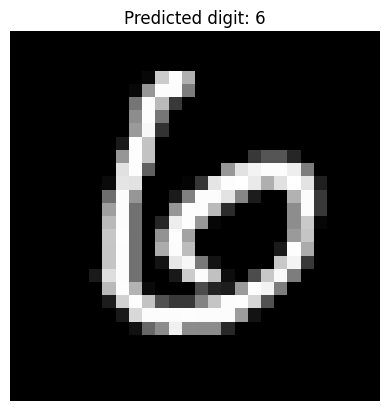

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict and visualize one sample
sample_index = 11
sample_image = x_test[sample_index].reshape(28, 28)
predicted_label = np.argmax(model.predict(x_test[sample_index].reshape(1, 28, 28, 1)))

plt.imshow(sample_image, cmap="gray")
plt.title(f"Predicted digit: {predicted_label}")
plt.axis("off")
plt.show()
